compute average connectivity between networks. two ways for that. we take approach 1.
1. compute network average time series, then network correlation
2. take correlation between pair seeds, then average on networks. COMPUTATION HEAVY.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
EPOCHS = ['baseline', 'early', 'late']

In [3]:
import pandas as pd

# the list of subjects, removed erroneous ones
subjects = pd.read_csv('data/subjects.csv')
S = subjects.int_id

In [4]:
# compute average timeseries within networks. for each subject

In [5]:
# load regions and networks

In [6]:
regions_networks = pd.read_csv('data/regions_sorted.csv')
regions_networks = regions_networks.set_index('region')[['7net', '17net']]
regions_networks

,7net,17net
region,,
7Networks_LH_Vis_1,Vis,DorsAttnA
7Networks_LH_Vis_2,Vis,VisCent
7Networks_LH_Vis_3,Vis,DorsAttnA
7Networks_LH_Vis_4,Vis,VisCent
7Networks_LH_Vis_5,Vis,DefaultC
...,...,...
Right Putamen,Striatum,StriatumRight
Right Pallidum,Striatum,StriatumRight
Right Hippocampus,Striatum,StriatumRight


# 7 networks

In [7]:
import seaborn

<AxesSubplot:xlabel='7net', ylabel='count'>

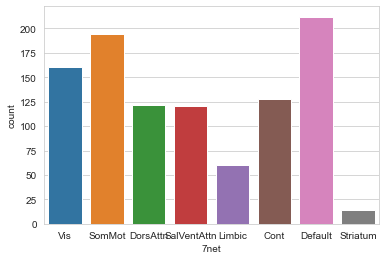

In [8]:
seaborn.countplot(x='7net', data=regions_networks)

In [9]:
# merge region with networks

In [10]:
# in data/ts/ we don't have cerebellum regions included. only 1012 regions.
def timeseries(subject, epoch): return pd.read_csv('data/ts/ts_'+str(subject)+'_'+epoch+'.csv')

In [11]:
timeseries(2, 'early')

,7Networks_LH_Vis_1,7Networks_LH_Vis_2,7Networks_LH_Vis_3,7Networks_LH_Vis_4,7Networks_LH_Vis_5,7Networks_LH_Vis_6,7Networks_LH_Vis_7,7Networks_LH_Vis_8,7Networks_LH_Vis_9,7Networks_LH_Vis_10,...,Left Hippocampus,Left Amygdala,Left Accumbens,Right Thalamus,Right Caudate,Right Putamen,Right Pallidum,Right Hippocampus,Right Amygdala,Right Accumbens
0,1.014596,-1.091588,-0.689694,1.241627,-0.340570,1.720721,0.967533,2.293730,2.010316,0.412217,...,-1.041489,-0.267003,-1.416582,-0.402665,-0.300350,-1.430332,-2.075004,-1.319881,-1.408298,-0.569785
1,-0.017981,-1.246902,-0.852229,0.497946,-0.180009,0.484244,0.425367,1.641563,0.102473,-1.044337,...,-0.737525,0.044909,-2.259635,0.334256,-0.257205,0.400759,-0.398104,-0.939234,-2.596470,-1.808215
2,-0.046829,-0.007308,-0.762256,0.290625,-0.038755,-0.193949,0.730557,0.711252,-0.510087,-1.367109,...,-1.121351,-1.474220,-0.968535,0.697382,-0.369876,-1.007650,0.673828,-1.164878,-2.246602,-1.127759
3,0.718207,1.897450,-0.633628,0.391128,-0.195887,-0.501972,1.481817,-0.274806,-0.275330,-0.914403,...,-0.584375,0.906345,-0.610170,0.917716,-0.400169,-0.623450,0.547832,1.019793,1.458249,-1.674909
4,1.196477,2.909276,-0.356611,0.356384,-0.403450,-0.980221,1.236471,-1.010066,-0.495124,-0.742500,...,-0.982943,0.124179,-3.054952,1.013425,-1.134643,-2.684311,-0.671150,-0.548500,-0.358232,-3.052191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1.190346,0.188570,1.549489,0.294034,1.256440,1.400601,-0.322071,0.309031,0.806456,-0.605588,...,-0.725585,-0.564259,0.820215,0.552382,0.741302,0.467841,-0.738184,0.503812,0.503846,0.478758
212,1.616681,-0.772797,0.348219,0.703259,0.774573,1.628457,0.132159,0.571886,1.236659,-0.005628,...,1.481471,0.164042,1.957584,-1.709704,-0.121189,-0.082285,0.054140,0.480666,0.683301,-0.114725
213,0.623776,-1.483784,-1.029800,-0.008584,0.024831,1.035390,-0.417054,0.426933,0.859438,0.739640,...,0.004107,-0.452319,-1.323474,-0.868613,-1.249402,-1.553779,0.248111,-1.029520,-2.141222,0.325281
214,-1.008527,-1.259907,-1.676959,-0.860828,-0.297023,-0.092415,-1.170222,0.021385,0.041190,0.796195,...,-0.493765,0.128323,-0.303865,-0.612217,0.112004,-0.557149,-2.762844,0.464664,0.067450,0.497687


In [12]:
t = timeseries(1, 'baseline')
t = t.transpose().join(regions_networks)
t = t.set_index(['7net', '17net'], append=True).reorder_levels([1,2,0])
t

0         1         2    \
7net     17net                                                            
Vis      DorsAttnA     7Networks_LH_Vis_1 -0.707022 -1.313980 -1.175622   
         VisCent       7Networks_LH_Vis_2 -0.763647 -1.436940 -1.051546   
         DorsAttnA     7Networks_LH_Vis_3  0.091984 -1.149532 -1.235031   
         VisCent       7Networks_LH_Vis_4 -0.364270 -0.640217 -0.431280   
         DefaultC      7Networks_LH_Vis_5 -0.671012 -0.504047  0.932604   
...                                             ...       ...       ...   
Striatum StriatumRight Right Putamen      -2.000160 -1.546196 -0.500277   
                       Right Pallidum     -0.479996 -1.642955  1.571292   
                       Right Hippocampus  -0.109435 -1.903944  0.372534   
                       Right Amygdala     -0.101183 -1.821804 -0.311690   
                       Right Accumbens    -0.529745 -1.266036  1.368992   

                                                3         4         5    \
7net     17net                                                            
Vis      DorsAttnA     7Networks_LH_Vis_1 -0.353504  0.700392  1.301949   
         VisCent       7Networks_LH_Vis_2 -0.274848 -0.007258 -0.177632   
         DorsAttnA     7Networks_LH_Vis_3 -0.234933  0.933005  1.432303   
         VisCent       7Networks_LH_Vis_4 -0.489042 -0.998473 -1.098922   
         DefaultC      7Networks_LH_Vis_5  2.243884  1.932399  0.182972   
...                                             ...       ...       ...   
Striatum StriatumRight Right Putamen       0.247186 -1.526489  0.696908   
                       Right Pallidum     -0.475064 -0.450150  0.424717   
                       Right Hippocampus   1.685276  0.004471  1.875403   
                       Right Amygdala      0.336718  0.469072  0.126565   
                       Right Accumbens     0.141097 -1.424279  0.923863   

                                                6         7         8    \
7net     17net                                                            
Vis      DorsAttnA     7Networks_LH_Vis_1  0.976792  0.021551 -0.700913   
         VisCent       7Networks_LH_Vis_2  0.019495  0.802751  1.261238   
         DorsAttnA     7Networks_LH_Vis_3  1.013983  0.015932 -0.927868   
         VisCent       7Networks_LH_Vis_4 -0.070309  1.480165  2.084688   
         DefaultC      7Networks_LH_Vis_5 -1.525892 -2.117232 -1.687216   
...                                             ...       ...       ...   
Striatum StriatumRight Right Putamen       0.790408  1.332148  1.424861   
                       Right Pallidum     -0.264470 -0.105608 -0.673473   
                       Right Hippocampus  -0.463826  0.202535 -1.176134   
                       Right Amygdala      0.559505  1.050917  0.709367   
                       Right Accumbens    -0.889585 -0.394071 -0.207838   

                                                9    ...       206       207  \
7net     17net                                       ...                       
Vis      DorsAttnA     7Networks_LH_Vis_1 -0.726012  ...  1.388161  0.877434   
         VisCent       7Networks_LH_Vis_2  0.493422  ... -1.616207 -3.028343   
         DorsAttnA     7Networks_LH_Vis_3 -1.326360  ...  0.362844 -0.916366   
         VisCent       7Networks_LH_Vis_4  1.065331  ... -1.545383 -2.761425   
         DefaultC      7Networks_LH_Vis_5 -0.888884  ...  1.094155  0.526152   
...                                             ...  ...       ...       ...   
Striatum StriatumRight Right Putamen       1.037297  ... -0.382882 -1.589091   
                       Right Pallidum     -0.791942  ...  0.315944  0.163960   
                       Right Hippocampus  -0.268446  ... -0.649928 -0.674580   
                       Right Amygdala     -0.227421  ...  1.035699  0.185121   
                       Right Accumbens    -0.220736  ... -2.486593 -0.371238   

                                                208       209       210  \
7net

In [13]:
t7net = t.groupby(level=0).mean().transpose()
t7net

7net,Cont,Default,DorsAttn,Limbic,SalVentAttn,SomMot,Striatum,Vis
0,0.328242,0.197413,-0.005770,0.017710,0.128759,0.254085,-0.275982,0.336823
1,0.337455,0.057440,-0.077459,-0.186831,0.169522,0.214957,-0.906358,0.268647
2,0.059855,-0.185777,0.038537,-0.294243,0.331097,0.218091,0.572301,0.403597
3,-0.241040,-0.418742,0.289783,-0.279323,0.337734,0.114790,0.358887,0.445448
4,-0.348988,-0.468001,0.460431,-0.167611,0.029903,-0.088870,-0.327745,0.124863
...,...,...,...,...,...,...,...,...
211,0.017240,0.523815,-0.066042,0.464328,0.114543,0.224043,0.489755,0.516335
212,0.148530,0.084737,-0.042895,-0.038488,0.218588,-0.009856,-0.441427,0.113958
213,0.200583,-0.326500,-0.075725,-0.492999,0.303097,-0.036008,-0.161227,-0.253188
214,0.756313,-0.065854,0.081643,-0.327684,0.574642,-0.022919,-0.225823,-0.084741


In [14]:
def ts_network(subject, epoch, net='7'):
    ts = timeseries(subject, epoch)
    ts = ts.transpose().join(regions_networks)
    ts = ts.set_index(['7net', '17net'], append=True).reorder_levels([1, 2, 0])
    assert net in ['7', '17']
    net_level = 0 if net == '7' else 1
    return ts.groupby(level=net_level).mean().transpose()

In [15]:
ts_network(2, 'baseline', net='17')

17net,ContA,ContB,ContC,DefaultA,DefaultB,DefaultC,DorsAttnA,DorsAttnB,LimbicA,LimbicB,SalVentAttnA,SalVentAttnB,SomMotA,SomMotB,StriatumLeft,StriatumRight,TempPar,VisCent,VisPeri
0,-0.271466,-0.225247,0.512717,0.134107,-0.325829,-0.265444,0.298597,-0.393778,0.188204,0.081478,-0.366279,0.032374,-0.737209,-0.681659,-0.804624,-0.186852,0.102076,0.301120,0.251590
1,-0.214743,-0.121366,0.404051,0.201975,-0.142574,0.456497,0.337778,-0.290238,0.461568,-0.025321,-0.528412,-0.260402,-0.765987,-0.267829,-0.928334,-1.123614,0.382730,0.221688,0.657475
2,0.125442,0.302262,0.189635,-0.047995,0.247620,0.519983,0.216033,0.122925,0.465943,-0.162170,-0.205494,0.080139,-0.091006,0.143214,0.875735,-0.250954,0.310457,0.064902,0.671094
3,0.480974,0.657125,-0.032846,-0.484319,0.325700,-0.067671,0.105216,0.511967,0.159756,-0.216873,0.203797,0.620952,0.573956,0.018393,1.167302,1.305232,-0.101963,-0.062350,0.178439
4,0.511548,0.527805,-0.214900,-0.707655,-0.070318,-0.611352,0.090991,0.477675,-0.254821,-0.206059,0.264190,0.649294,0.562045,-0.524451,0.111903,0.111105,-0.495594,-0.212461,-0.521704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.654577,0.657621,-0.119345,0.007667,-0.437305,0.616555,0.459310,0.125654,0.497193,0.064568,0.127831,0.260672,0.300911,-0.076421,0.295681,-0.032776,0.019946,0.584212,0.533457
212,0.187961,0.207320,-0.250312,0.235595,-0.550200,0.344738,-0.107710,-0.638652,0.342569,0.306282,-0.097307,0.091021,0.154837,0.109885,-0.030912,-0.118323,-0.215093,0.254545,0.400144
213,-0.512846,-0.448014,-0.334306,0.301363,-0.390245,-0.112368,-0.508513,-1.016216,0.006240,0.476451,-0.224817,-0.112540,-0.067479,0.178655,1.078868,0.590589,-0.246684,-0.120170,0.130180
214,-0.592293,-0.394353,-0.070654,0.148804,-0.024133,-0.109714,-0.299521,-0.571552,0.089995,0.471178,-0.188934,-0.060762,-0.429067,-0.353389,0.894148,0.400249,-0.195490,-0.179817,0.151331


In [16]:
import numpy as np
from nilearn.connectome import ConnectivityMeasure


def cmat(ts: pd.DataFrame, fill_diag=False, kind='covariance') -> np.ndarray:
    conn_measure = ConnectivityMeasure(kind=kind)
    cmat = conn_measure.fit_transform([ts.to_numpy()])[0]
    if fill_diag:   np.fill_diagonal(cmat, 0)
    return cmat

In [17]:
c7 = cmat(t7net)
c7

array([[0.18752543, 0.09686171, 0.04318358, 0.01008529, 0.06350833,
        0.00667398, 0.01351371, 0.01097641],
       [0.09686171, 0.22331346, 0.01421543, 0.0515309 , 0.02683451,
        0.07056402, 0.0718005 , 0.03214479],
       [0.04318358, 0.01421543, 0.16162735, 0.0228981 , 0.07808557,
        0.05137162, 0.0185011 , 0.05161251],
       [0.01008529, 0.0515309 , 0.0228981 , 0.09422089, 0.01987423,
        0.04716039, 0.03245987, 0.00727101],
       [0.06350833, 0.02683451, 0.07808557, 0.01987423, 0.17282767,
        0.09667838, 0.01812161, 0.09302599],
       [0.00667398, 0.07056402, 0.05137162, 0.04716039, 0.09667838,
        0.17605181, 0.04287246, 0.10257901],
       [0.01351371, 0.0718005 , 0.0185011 , 0.03245987, 0.01812161,
        0.04287246, 0.23362703, 0.00334288],
       [0.01097641, 0.03214479, 0.05161251, 0.00727101, 0.09302599,
        0.10257901, 0.00334288, 0.18819502]])

In [24]:
# compute for all subjects

In [25]:
from scipy.stats import pearsonr

In [26]:
from tqdm import tqdm
tqdm.pandas()

In [27]:
seeds7nets = ts_network(1, 'baseline', net='7').columns.tolist()

In [28]:
print(seeds7nets)

['Cont', 'Default', 'DorsAttn', 'Limbic', 'SalVentAttn', 'SomMot', 'Striatum', 'Vis']


In [29]:
def seed_corr(net='7'):
    assert net in ('7', '17')
    seeds = ts_network(1, 'baseline', net=net).columns.tolist()
    print('networks:',seeds)

    list0 = []
    for seed in tqdm(seeds):
        list1 = []
        for e in EPOCHS:
            list2 = []
            for subj in S:
                ts = ts_network(subj, e, net=net)    # changed to network level average
                seed_ts = ts[seed]
                # we neglect pvalue of whether r is significant
                r = [pearsonr(seed_ts, ts[idx])[0] for idx in ts]  # pearsonr()[0] is rvalue; [1] is pvalue
                r = pd.DataFrame({'r': r}, index=ts.columns)
                r.rename_axis('net', inplace=True)
                r = pd.concat([r], keys=[subj], names=['subject'])
                list2.append(r)
            r = pd.concat(list2, 0)
            r = pd.concat([r], keys=[e], names=['epoch'])  # adds epoch as lower level index
            list1.append(r)

        dfr = pd.concat(list1, 0)
        dfr = pd.concat([dfr], keys=[seed], names=['seed_net'])
        list0.append(dfr)

    dfr = pd.concat(list0, 0)
    return dfr

In [30]:
dfr7 = seed_corr(net='7')

networks: ['Cont', 'Default', 'DorsAttn', 'Limbic', 'SalVentAttn', 'SomMot', 'Striatum', 'Vis']


100%|██████████| 8/8 [00:40<00:00,  5.01s/it]


In [31]:
dfr7 = dfr7.round(4)
# important to round values when applying statistical tests.

In [32]:
dfr7

r
seed_net epoch    subject net                
Cont     baseline 1       Cont         1.0000
                          Default      0.5034
                          DorsAttn     0.2667
                          Limbic       0.0841
                          SalVentAttn  0.3784
...                                       ...
Vis      late     46      Limbic       0.4052
                          SalVentAttn  0.3975
                          SomMot       0.4692
                          Striatum     0.1438
                          Vis          1.0000

[6912 rows x 1 columns]

average example

In [33]:
dfr_mean = dfr7.groupby(level=[0, 1, 3]).mean()
dfr_mean

r
seed_net epoch    net                  
Cont     baseline Cont         1.000000
                  Default      0.296397
                  DorsAttn     0.496775
                  Limbic       0.184828
                  SalVentAttn  0.334569
...                                 ...
Vis      late     Limbic       0.238892
                  SalVentAttn  0.154953
                  SomMot       0.326044
                  Striatum     0.161633
                  Vis          1.000000

[192 rows x 1 columns]

<AxesSubplot:xlabel='net', ylabel='seed_net'>

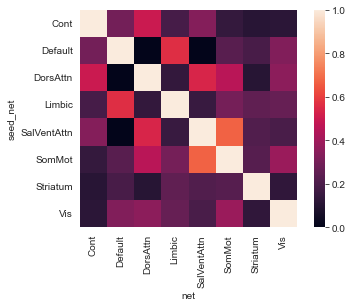

In [34]:
mean_ = dfr_mean.reorder_levels([1,0,2]).loc['baseline'].unstack()['r']
seaborn.heatmap(mean_,
                vmin=0, vmax=1, square=True)

<AxesSubplot:xlabel='net', ylabel='seed_net'>

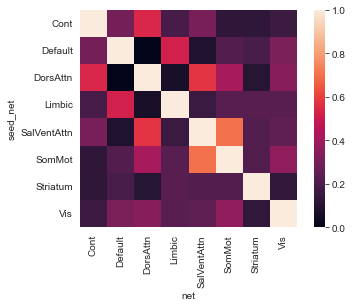

In [35]:
mean_ = dfr_mean.reorder_levels([1,0,2]).loc['early'].unstack()['r']
seaborn.heatmap(mean_,
                vmin=0, vmax=1, square=True)

In [36]:
import pingouin as pg

In [37]:
def ttest_epochs(df):
    df.index = df.index.droplevel([0,1])
    df = df.unstack(0)
    df.columns = df.columns.droplevel(0)
    b2e = pg.ttest(df['early'], df['baseline'], paired=True, alternative='greater').loc['T-test']
    e2l = pg.ttest(df['late'], df['early'], paired=True, alternative='greater').loc['T-test']
    return pd.Series([b2e['T'], b2e['p-val'], e2l['T'], e2l['p-val']], index=['b2e_t', 'b2e_p', 'e2l_t', 'e2l_p'])

In [38]:
# shift between epochs, like baseline2early

In [39]:
dfp7 = dfr7.reorder_levels([0,3,1,2]).groupby(level=[0,1]).apply(ttest_epochs)

In [40]:
dfp7.head()

b2e_t     b2e_p     e2l_t     e2l_p
seed_net net                                                
Cont     Cont              NaN       NaN       NaN       NaN
         Default     -0.013792  0.505463  0.474575  0.319019
         DorsAttn     1.939664  0.030257 -1.283521  0.896129
         Limbic       0.087746  0.465289 -0.545873  0.705692
         SalVentAttn -0.732070  0.765500 -0.696040  0.754500

<AxesSubplot:xlabel='seed_net', ylabel='net'>

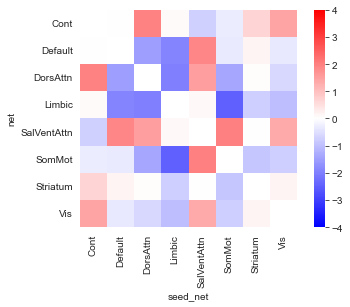

In [41]:
seaborn.heatmap(dfp7.unstack(0)['b2e_t'],
                vmin=-4, vmax=4,
                cmap='bwr', square=True)

In [42]:
dfr7 = dfr7.reorder_levels([0,3,1,2])

In [43]:
df = dfr7.unstack(2)
df = df['r']
df['b2e'] = df['early'] - df['baseline']
df['e2l'] = df['late'] - df['early']
df.loc['Cont', 'Default']

epoch,baseline,early,late,b2e,e2l
subject,,,,,
1,0.5034,0.3668,0.4897,-0.1366,0.1229
2,0.4760,0.1046,0.3544,-0.3714,0.2498
3,0.1637,0.0457,0.2904,-0.1180,0.2447
4,0.3841,0.4403,0.2935,0.0562,-0.1468
6,0.1708,0.3536,0.1697,0.1828,-0.1839
7,0.3608,0.5109,0.5303,0.1501,0.0194
8,0.4355,0.1671,0.3192,-0.2684,0.1521
9,-0.0092,0.1447,-0.1385,0.1539,-0.2832
10,0.2016,0.1846,0.2789,-0.0170,0.0943


In [44]:
# load behavioral data

In [45]:
metrics = pd.read_csv('data/metrics.csv').set_index('subject').drop(columns=['Subject'])
metrics

,tscore,RLScore
subject,,
1,-7.195868,-1.179789
2,-5.822339,1.104018
3,-2.248812,-0.302101
4,-6.593196,-1.400917
6,-15.539946,0.868475
7,-4.009663,0.859943
8,-6.426085,1.433999
9,-11.893333,-0.661215
10,-3.318209,-0.337563


In [46]:
df = df.join(metrics)

In [47]:
df

baseline  early  late  b2e  e2l     tscore   RLScore
seed_net net  subject                                                      
Cont     Cont 1             1.0    1.0   1.0  0.0  0.0  -7.195868 -1.179789
              2             1.0    1.0   1.0  0.0  0.0  -5.822339  1.104018
              3             1.0    1.0   1.0  0.0  0.0  -2.248812 -0.302101
              4             1.0    1.0   1.0  0.0  0.0  -6.593196 -1.400917
              6             1.0    1.0   1.0  0.0  0.0 -15.539946  0.868475
...                         ...    ...   ...  ...  ...        ...       ...
Vis      Vis  40            1.0    1.0   1.0  0.0  0.0  -8.408968  1.119882
              41            1.0    1.0   1.0  0.0  0.0  -7.447315  0.007867
              44            1.0    1.0   1.0  0.0  0.0  -5.891292  0.350276
              45            1.0    1.0   1.0  0.0  0.0  -4.692163  1.649951
              46            1.0    1.0   1.0  0.0  0.0  -1.138829 -0.116459

[2304 rows x 7 columns]

<AxesSubplot:xlabel='b2e', ylabel='RLScore'>

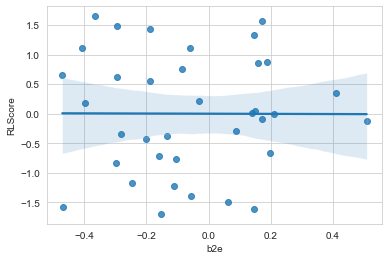

In [48]:
seaborn.regplot(data=df.loc['Default', 'DorsAttn'], x='b2e', y='RLScore')

In [49]:
pg.ttest(df.loc['Default', 'DorsAttn']['b2e'],0)    # sanity check

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.526751,35,two-sided,0.13581,"[-0.15, 0.02]",0.254458,0.516,0.317673


In [50]:
# baseline 2 early Connectivity shift

In [51]:
def r_value(data, x, y):   return pearsonr(data[x], data[y])[0]
def p_value(data, x, y):   return pearsonr(data[x], data[y])[1]

num of significant nets 2


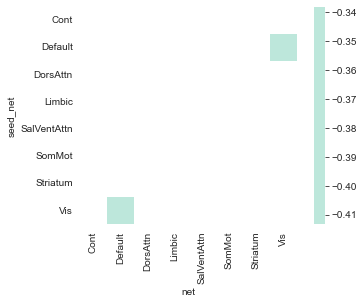

In [52]:
p = df.groupby(level=[0,1]).apply(p_value, x='b2e', y='RLScore')
print('num of significant nets',(p<.05).sum())
r = df.groupby(level=[0,1]).apply(r_value, x='b2e', y='RLScore')
r, p = r.unstack(), p.unstack()

ax = seaborn.heatmap(r[p<.05], square=True, center=0)
fig = ax.get_figure()
# fig.savefig("plots/b2e-shift-vs-behavior-7net.png")

In [53]:
# early 2 late Connectivity shift

num of significant nets 4


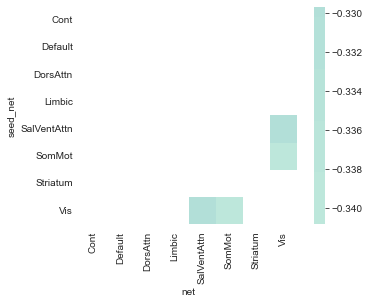

In [54]:
p = df.groupby(level=[0,1]).apply(p_value, x='e2l', y='RLScore')
print('num of significant nets',(p<.05).sum())
r = df.groupby(level=[0,1]).apply(r_value, x='e2l', y='RLScore')
r, p = r.unstack(), p.unstack()

ax = seaborn.heatmap(r[p<.05], square=True, center=0)
fig = ax.get_figure()
# fig.savefig("plots/b2e-shift-vs-behavior-7net.png")

# 17 networks

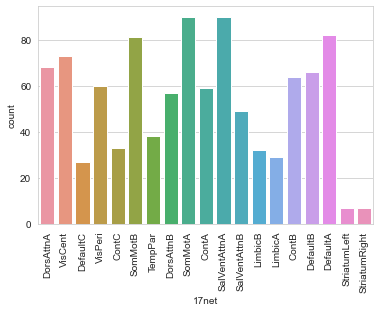

In [55]:
ax = seaborn.countplot(x='17net', data=regions_networks)
ax.tick_params(axis='x', rotation=90)

In [56]:
dfr17 = seed_corr(net='17')

networks: ['ContA', 'ContB', 'ContC', 'DefaultA', 'DefaultB', 'DefaultC', 'DorsAttnA', 'DorsAttnB', 'LimbicA', 'LimbicB', 'SalVentAttnA', 'SalVentAttnB', 'SomMotA', 'SomMotB', 'StriatumLeft', 'StriatumRight', 'TempPar', 'VisCent', 'VisPeri']


100%|██████████| 19/19 [01:39<00:00,  5.22s/it]


In [57]:
dfr17 = dfr17.round(4)
# important to round

average example

In [58]:
dfr_mean = dfr17.groupby(level=[0, 1, 3]).mean()
dfr_mean

r
seed_net epoch    net                    
ContA    baseline ContA          1.000000
                  ContB          0.589164
                  ContC          0.223972
                  DefaultA      -0.048828
                  DefaultB       0.115700
...                                   ...
VisPeri  late     StriatumLeft   0.149611
                  StriatumRight  0.137394
                  TempPar        0.264767
                  VisCent        0.667119
                  VisPeri        1.000000

[1083 rows x 1 columns]

<AxesSubplot:xlabel='net', ylabel='seed_net'>

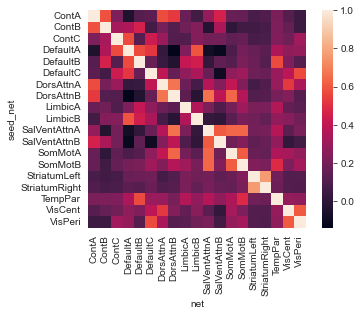

In [59]:
mean_ = dfr_mean.reorder_levels([1,0,2]).loc['baseline'].unstack()['r']
seaborn.heatmap(mean_, square=True)

<AxesSubplot:xlabel='net', ylabel='seed_net'>

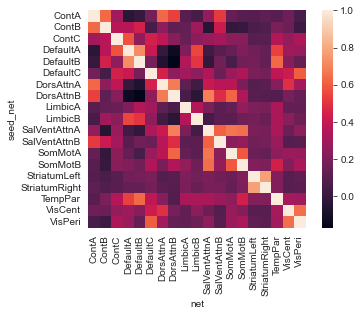

In [60]:
mean_ = dfr_mean.reorder_levels([1,0,2]).loc['early'].unstack()['r']
seaborn.heatmap(mean_,square=True)

shift between epochs, like baseline2early

In [62]:
dfr17 = dfr17.reorder_levels([0,3,1,2])

In [63]:
dfp17 = dfr17.groupby(level=[0,1]).apply(ttest_epochs)

In [64]:
dfp17.head()

b2e_t     b2e_p     e2l_t     e2l_p
seed_net net                                             
ContA    ContA          NaN       NaN       NaN       NaN
         ContB     1.806782  0.039700  0.624149  0.268288
         ContC     1.774414  0.042347 -0.082243  0.532539
         DefaultA  0.179534  0.429277  1.506974  0.070395
         DefaultB -2.848274  0.996344  3.163173  0.001610

num of significant out of 361 nets: 60


<AxesSubplot:xlabel='seed_net', ylabel='net'>

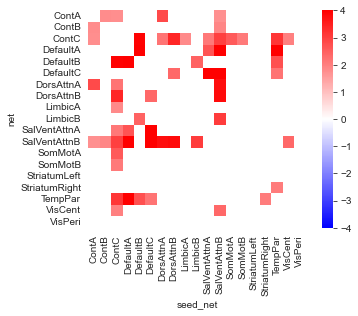

In [65]:
pair = 'b2e'
p = dfp17[pair+'_p']
print('num of significant out of',19*19, 'nets:',(p<.05).sum())
p = dfp17.unstack(0)[pair+'_p']
t = dfp17.unstack(0)[pair+'_t']
seaborn.heatmap(t[p<.05], vmin=-4, vmax=4,
                cmap='bwr', square=True)

early 2 late Connectivity shift

num of significant out of 361 nets: 42


<AxesSubplot:xlabel='seed_net', ylabel='net'>

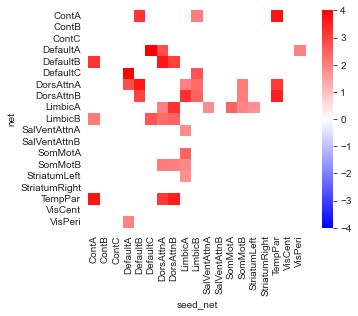

In [67]:
pair = 'e2l'
p = dfp17[pair+'_p']
print('num of significant out of',19*19, 'nets:',(p<.05).sum())
p = dfp17.unstack(0)[pair+'_p']
t = dfp17.unstack(0)[pair+'_t']
seaborn.heatmap(t[p<.05], vmin=-4, vmax=4,
                cmap='bwr', square=True)

appendix 1: test if b2e t-tests works actually

In [68]:
d = dfr7.loc['Default', 'DorsAttn']

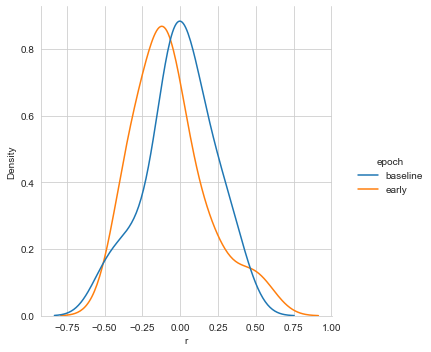

In [69]:
seaborn.displot(d.reset_index().iloc[:-36]
                , x='r', hue='epoch', kind='kde')

In [70]:
d = d.unstack(0)['r']

In [71]:
d

epoch,baseline,early,late
subject,,,
1,0.0800,-0.1671,0.1889
2,0.2533,-0.1538,-0.0745
3,-0.0958,-0.0062,0.1560
4,0.0303,-0.0246,-0.0754
6,-0.3035,-0.1151,-0.2679
7,-0.0330,0.1264,0.1935
8,0.0915,-0.0959,0.1422
9,-0.3255,-0.1264,-0.2464
10,0.1855,-0.0970,0.3150


In [72]:
pg.ttest(d['early'],d['baseline'], alternative='greater', paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.526751,35,greater,0.932095,"[-0.13, inf]",0.267985,0.969,0.000636


In [73]:
d['b2e'] = d['early'] - d['baseline']

In [74]:
d

epoch,baseline,early,late,b2e
subject,,,,
1,0.0800,-0.1671,0.1889,-0.2471
2,0.2533,-0.1538,-0.0745,-0.4071
3,-0.0958,-0.0062,0.1560,0.0896
4,0.0303,-0.0246,-0.0754,-0.0549
6,-0.3035,-0.1151,-0.2679,0.1884
7,-0.0330,0.1264,0.1935,0.1594
8,0.0915,-0.0959,0.1422,-0.1874
9,-0.3255,-0.1264,-0.2464,0.1991
10,0.1855,-0.0970,0.3150,-0.2825


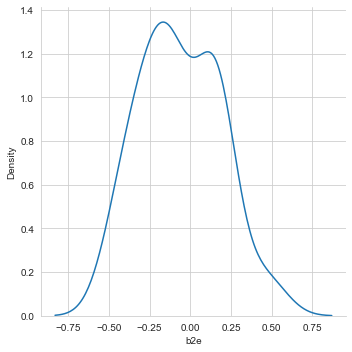

In [75]:
seaborn.displot(d['b2e'], kind='kde')

In [76]:
pg.ttest(d['b2e'],0, alternative='less', paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.526751,35,less,0.067905,"[-inf, 0.01]",0.254458,1.032,0.441297


appendix 2: comparing list of 1.'s with 1 that leads to false conclusion: 0.99999998 != 1